#**Parite 1 : Modélisation et fonctions simples**

In [1]:
##### ------ imports ------ #####

import numpy as np
import random as rd
import matplotlib.pyplot as plt

##### ------ codage et dictionnaire ------ #####

bateau_code = {"porte_avion": 1, "croiseur": 2,
               "contre_torpilleurs": 3, "sous_marin": 4, "torpilleur": 5}

bateau_longueur = {1: 5, 2: 4, 3: 3, 4: 3, 5: 2}

##### ------ taille de la grille ------ #####

taille_grille=2
while taille_grille<10:
  taille_grille=int(input("Donner la taille de la grille 'T x T' (minimum 10): "))

Donner la taille de la grille 'T x T' (minimum 10): 10


## Fonction peut_placer

In [2]:
def peut_placer(grille_pp, bateau, position, direction):
    # recuperation des coordonnées de la postion
    Px, Py = position

    # recuperation de la longueur de bateau
    longueur = bateau_longueur[bateau]

    # tester les conditions nécessaires ex : les coordonnées de la position 
    # doivent etre comprise entre 0 et taille de la grille - 1

    if((Px >= taille_grille) or (Py >= taille_grille) or (Px <0) or (Py <0)):
        return False
    if(direction != 1 and direction != 2):
        return False
    if(bateau > 5 or bateau < 1):
        return False
    if(grille_pp[Px, Py] != 0):
        return False
    else:
      # si insertion horizontale on test l'axe des y
        if(direction == 1):
            if(Py+longueur > len(grille_pp)):
                return False
            else:
                i = 0
                while(i < longueur):
                    if(grille_pp[Px, Py+i] != 0):
                        return False
                    i += 1
                return True
        # si insertion horizontale on test l'axe des x
        else:
            if(Px+longueur > len(grille_pp)):
                return False
            else:
                i = 0
                while(i < longueur):
                    if(grille_pp[Px+i, Py] != 0):
                        return False
                    i += 1
                return True

### Test

In [ ]:
# bateau = 3
# direction = 2
# position = (0,0)
# grille_pp = np.zeros((taille_grille, taille_grille))
# # vous pouver voir qu'avec np.ones ça va retourner faux par exemple
# #grille_pp = np.ones((taille_grille, taille_grille))
# peut_placer(grille_pp, bateau, position, direction)

## Fonction place

In [3]:
def place(grille_p, bateau, position, direction):
    # on place un bateau uniquement si peut_placer == True
    if(peut_placer(grille_p, bateau, position, direction) == True):
        Px, Py = position
        longueur = bateau_longueur[bateau]
        # placer horizontalement
        if(direction == 1):
            i = 0
            while(i < longueur):
                grille_p[Px, Py+i] = bateau
                i += 1
        # placer verticalement
        else:
            i = 0
            while(i < longueur):
                grille_p[Px+i, Py] = bateau
                i += 1

### Test

In [ ]:
# bateau = 3
# direction = 2
# position = (0,0)
# # on utilise la fonction affiche pour afficher avant et apres place
# grille_pp = np.zeros((taille_grille, taille_grille))

In [ ]:
# affiche(grille_pp) # la fonction affiche est définit plus loin 

In [ ]:
# place(grille_pp, bateau, position, direction)

In [ ]:
# affiche(grille_pp)

## Fonction place_alea

In [4]:
def place_alea(grille_pa, bateau):
    valide = False
    #initialisation d'un boolean qui nous indique si on peut placer ce bateau
    while(valide == False):
        #generer des coordonnées aléatoirement à l'aide de module random 
        # voir : https://docs.python.org/3/library/random.html
        Px = rd.randint(0, taille_grille -1)
        Py = rd.randint(0, taille_grille -1)

        #generer une direction aléatoirement à l'aide de module random 
        direction = rd.randint(1, 2)
        position = Px, Py

        #appler peut placer
        valide = peut_placer(grille_pa, bateau, position, direction)

    #si peut_placer == True alors on place le bateau
    place(grille_pa, bateau, position, direction)

### Test

In [ ]:
# grille_pp = np.zeros((taille_grille, taille_grille))
# affiche(grille_pp)

In [ ]:
# place_alea(grille_pp,2)

In [ ]:
# affiche(grille_pp)

## Fonction affiche

In [5]:
def affiche(grille_a):
  labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  plt.xticks(np.arange(-0.5, 10, 1.0),labels)
  plt.yticks(np.arange(-0.5, 10, 1.0),labels)
  plt.grid()
  plt.imshow(grille_a)

## Fonction eq

In [6]:
def eq(grilleA, grilleB):
    # on compare chaque ligne si elle est egale a l'autre pour chaque ligne de la matrice
    # grace a la fonction array_equal voir : https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html
    return np.array_equal(grilleA, grilleB)

### Test

In [ ]:
# grille_1 = np.zeros((taille_grille, taille_grille))
# grille_2 = np.ones((taille_grille, taille_grille))
# eq(grille_1, grille_2)

## Fonction genere_grille

In [7]:
def genere_grille():
    # initialiser une grille à zero 
    # voir : https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
    grille_gg = np.zeros((taille_grille, taille_grille))

    for i in range(1, 6):
      # pour chaque bateau de 1 à 5, on le place aléatoirement
        bateau = i
        place_alea(grille_gg, bateau)
    
    #retourner a la fin la grille
    return grille_gg

## Test

In [ ]:
# affiche(genere_grille())

# **Partie 2 :  Combinatoire du jeu**

## Question 2

In [8]:
def nbr_facon_placer_bateau_grille_vide(bateau):
    return (taille_grille - bateau_longueur[bateau] + 1) * taille_grille * 2

### Test

In [ ]:
# print(nbr_facon_placer_bateau_grille_vide(1))

# print(nbr_facon_placer_bateau_grille_vide(2))
# # remarque voici le codage utilisé: 
# # bateau_code = {"porte_avion": 1, "croiseur": 2, "contre_torpilleurs": 3, "sous_marin": 4, "torpilleur": 5}

## Question 3

In [9]:
def nbr_facon_placer_liste_bateaux_grille_vide(grille_vide, liste_bateau):
  compteur=0
  if(len(liste_bateau)==0): # si la liste de bateau est vide on retourne 1
    return 1
  else:
    for i in range(taille_grille):
        for j in range(taille_grille):
            for direction in [1, 2]: 
              # pour chaque position dans la matrice, dans les deux directions
              # on voit si on peut placer le premier bateau
                if peut_placer(grille_vide, liste_bateau[0], (i, j), direction):
                  # si True, alors on le place
                    place(grille_vide, liste_bateau[0], (i, j), direction)
                  # on appelle la fonction récursivement avec l'ensemble des bateau - le premier
                  # et on incrémente notre compteur à chaque fois
                    compteur+= nbr_facon_placer_liste_bateaux_grille_vide(grille_vide, liste_bateau[1:])
                  # on supprime le bateau deja placer on refait les étirations 
                    supprimer_bateau(grille_vide, liste_bateau[0])
    return compteur


def supprimer_bateau(grille_sb, bateau):
  '''fonction qui permet de supprimer un bateau donnee dans une grille'''
  # l'idee c'est de mettre a zero toutes les cases 
  # qui correspondent à l'indice du  bateau
  for i in range(taille_grille):
    for j in range(taille_grille):
      if(grille_sb[i,j]==bateau):
        grille_sb[i,j]=0

### Test

In [ ]:
# # remarque il faut envoyer en parametre une grille vide
# grille=np.zeros((taille_grille, taille_grille))
# liste = [1,2,3]
# print(nbr_facon_placer_liste_bateaux_grille_vide(grille,liste))

## Question 4

In [10]:
def nbr_grilles_generees(grille_nb):
    cpt = 0
    # l'idee c'est d'utiliser la fonction eq entre deux matrice, 
    # la première qui est la matrice passée en argument,
    # la deuxieme c'est la matrice genérée a partir notre fonction genere_grille 
    while(eq(grille_nb, genere_grille()) == False):
        cpt += 1
    return cpt

### Test : attention

In [ ]:
#### encore attention: il est déconseillé de tester cette fonction car ca peut prendre jusqu'a une année haha
### grille = genere_grille()
### nbr_grilles_generees(grille)

# Partie 3 : Modélisation probabiliste du jeu

## Classe Bataille

In [11]:
class Bataille:

    def __init__(self):
        #chaque bataille, a une grille aleatoire
        # et de plus le nombre de coup tiré sur cette grille
        self.grille = genere_grille()
        self.taille = len(self.grille)
        self.nombreCoup = 0


    def nombre_cases_restantes(self, num_bateau):
      '''fonction qui calcule le nombre de case restante pour un bateau donnée
      on l'utilise souvent dans la fonction joue pour déterminer si un bateau est
      coulé ou juste touché
      '''
      compteur = 0
      for i in range(self.taille):
        for j in range(self.taille):
          if(self.grille[i, j] == num_bateau):
            compteur += 1
      return compteur

    def joue(self, position):
      # on récupère les coordonnées de la position
        px = position[0]
        py = position[1]
      # on incrémente le nombre de coup joué
        self.nombreCoup += 1
      # si la case est vide, le message de retour est "vide"
      # et on met la case à 20 pour la différencier dans les prochains coup
        if(self.grille[px, py] == 0):
            message = "vide"
            
            self.grille[px, py] = 20
        else:
          # on récupère l'indice du bateau à la position x y
            valeur_position = self.grille[px, py]
            # si le nombre de case restante avec l'indice du bateau X est egale a 1
            # alors on va couler le bateau donc on renvoie "coulé" si seulement
            # c'est un indice de bateau bien sur
            if(0<valeur_position<6):
              if(self.nombre_cases_restantes(num_bateau=valeur_position) == 1):
                message = "coulé"
              else:
                # sinon le bateau est juste touché
                message = "touché"
            # on met la case à 15 pour la différencier dans les prochains coup
              self.grille[px, py] = 15
            # si ce n'est pas un indice d'un bateau on retourne "vide"
            else:
              message = "vide"
              self.grille[px, py] = 20

      # on retourne le message 
        return message


    def victoire(self):
      # l'idee c'est de dire : s'il reste au moin une case avec un indice d'un bateau
      # de 1 à 5 alors on n'a pas encore gagné
        i = 0
        while(i < len(self.grille)):
            j = 0
            while(j < len(self.grille)):
                if(self.grille[i, j] > 0 and self.grille[i, j] < 6):
                    return False
                j += 1
            i += 1
        return True

    def reset(self):
      # pour la fonction reset, on a pensé à générer une nouvelles grille aleaoire
      # a l'aide de la fonction genere_grille
        self.grille = genere_grille()

      # si on voulait penser à reset comme mettre à zero toutes les cases de la grille
      # alors on appliquera ce code :
      # self.grille = np.zeros((taille_grille, taille_grille))


## Classe Joueur

In [12]:
class Joueur:
  # on crée ici une classe Joueur qui contient :
  # une liste d'action possible de 0,0 jusqu'a 9,9
  # une bataille de type Bataille
    def __init__(self):
        self.action_possible = [(i, j)
                                for i in range(0, taille_grille) for j in range(0, taille_grille)]
        
        self.bataille = Bataille()

    def afficher_bataille(self):
      # méthode affiche bataille pour qu'on affiche la grille avant et apres qu'on joue
      affiche(self.bataille.grille)
    

    def tirer_position_aleatoire(self):
      # fonction qui tire aleatoirement une positon à partir de notre liste des positions possible
        if (len(self.action_possible) > 0):
          # tirer une position aleatoirement
            position = rd.choice(self.action_possible)
          # supprimer cette positions de la liste de nos positions possibles
            self.action_possible.remove(position)
          # retourner la postion
            return position

## Joueur Version aléatoire

In [13]:
# classe Aleatoirement qui décrit la version aléatoire
class Aleatoire(Joueur):
  
  def jouer_aleatoirement(self):
    # tant qu'on n'a pas gagné encore
        while(self.bataille.victoire() == False):
          # on tire une position aléatoire et on joue
            self.bataille.joue(position=super().tirer_position_aleatoire())
      # une fois on a gagné, on retourne le nombre de coup
        return self.bataille.nombreCoup

### Test version aléatoire

In [ ]:
joueur1 = Aleatoire()

#### affichage de la grille avant de jouer

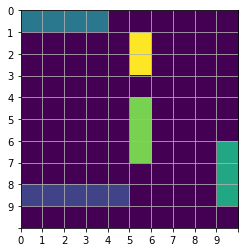

In [ ]:
joueur1.afficher_bataille()

#### jouer aléatoirement et voir le nombre de coup

In [ ]:
joueur1.jouer_aleatoirement()

100

#### affichage de la grille apres avoir joué

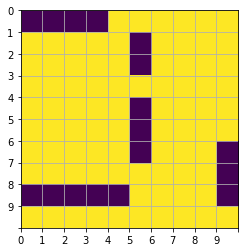

In [ ]:
joueur1.afficher_bataille()

###  distribution de la variable aléatoire correspondant au nombre de coups pour terminer une partie 

In [14]:
distribution_aleatoire=[]
# on cree une liste vide on la remplie a chaque fois qu'on joue pour former la distibution
# on calcule la distribution pour 1000 fois joué
for i in range(1,1001):
  joueur1 = Aleatoire()
  compteur=joueur1.jouer_aleatoirement()
  distribution_aleatoire.append(compteur)

#### Tracez le graphique de la distribution

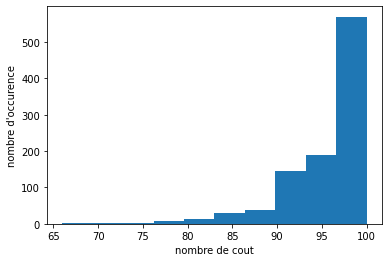

In [ ]:
plt.hist(distribution_aleatoire)
plt.xlabel('nombre de cout')
plt.ylabel("nombre d'occurence")
plt.show()

## Joueur Version heuristique

In [15]:
class Heuristique(Joueur):
  def jouer_heuristique(self):
    # on cree une liste de bateau touche qui est initialement vide
    bateau_touche = []
    while (self.bataille.victoire() == False):
      # tant qu'on a pas encore gagné
      if(len(bateau_touche)==0):
        # si la liste de bateau de touché est vide alors on joue aleatoirement 
        # on tire une position aleatoire
        pos = super().tirer_position_aleatoire()
        # et on joue
        msg_analyse = self.bataille.joue(position=pos)
        #  si on touche un bateau, alors on insert la position du bateau dans notre liste de bateau touché
        if(msg_analyse == "touché"):
          bateau_touche.append(pos)
      else:
        # ici la liste de bateau de touché n'est  oas vide alors
        # on exploite les cases connexes
        positon_bat_touche=bateau_touche[0]
        px,py=positon_bat_touche

        pos_connexe=[(px+1,py), (px-1,py), (px,py+1), (px,py-1)]
        #pour chaque position connexe
        for p in pos_connexe:
          # si la position est une action possible 
          if p in (self.action_possible):
            # on joue dans la case connexe
            msg_analyse = self.bataille.joue(position=p)
            # on supprime la postion jouée
            self.action_possible.remove(p)
            # on analyse le message de retour 
            if(msg_analyse == "touché"):
              # si on a touché un bateau alors on ajoute cette position a notre liste de bateau touché
              bateau_touche.append(p)
        
        #on supprime la position dont on a exploité ses case connexe 
        bateau_touche.pop(0)
    
    # a la fin on retourne le nombre de coup
    return self.bataille.nombreCoup

### Test version heuristique

In [ ]:
joueur2 = Heuristique()

#### affichage de la grille avant de jouer

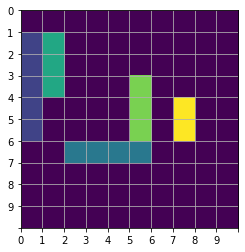

In [ ]:
joueur2.afficher_bataille()

#### jouer heuristiquement et voir le nombre de coup

In [ ]:
joueur2.jouer_heuristique()

61

#### affichage de la grille apres avoir joué

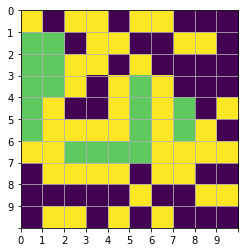

In [ ]:
joueur2.afficher_bataille()

###  distribution de la variable aléatoire correspondant au nombre de coups pour terminer une partie

In [16]:
distribution_heuristique=[]
for i in range(1,1001):
  joueur2 = Heuristique()
  compteur=joueur2.jouer_heuristique()
  distribution_heuristique.append(compteur)

#### Tracez le graphique de la distribution

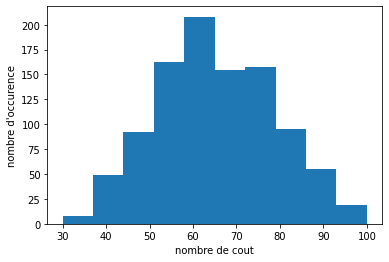

In [ ]:
plt.hist(distribution_heuristique)
plt.xlabel('nombre de cout')
plt.ylabel("nombre d'occurence")
plt.show()

## Joueur Version probabiliste simplifiée

In [17]:
class  probabiliste_simplifiee(Joueur):
  def jouer_probaSimple(self):
    # une crée une liste avec l'ensemble de tous les bateaux
    bateau_restant=[1,2,3,4,5]
    # on crée une grille nulle qui sera notre grille de probabilité 
    grille_proba=np.zeros((taille_grille, taille_grille))
    # on appelle la fonction qui nous retourne la position avec 
    # la probabilité la plus grande
    pos_proba_max=calcul_proba(bateau_restant,grille_proba)
    # tant qu'on n'a pas encore gagné et il reste un bateau au moin
    while(self.bataille.victoire()==False and len(bateau_restant)>0 and len(self.action_possible)>0):
      #on récupère les coordonnées de la position avec la probabilité la plus haute
      px=pos_proba_max[0]
      py=pos_proba_max[1]
      # si la position est une position valide
      if pos_proba_max in self.action_possible:
        # on la retire de notre liste des positions possible
        self.action_possible.remove(pos_proba_max)
        # on récupère l'indice de bateau 
        bat=self.bataille.grille[px,py]
        # on joue à cette position avec la proba la plus grande
        msg_analyse = self.bataille.joue(position=pos_proba_max)
        # on élimine la case ou on a joué de notre grille de probabilité
        grille_proba[px,py]=-1
        # si le bateau a été coulé alors on le supprime de notre liste de bateau restant
        if(msg_analyse=="coulé"):
          bateau_restant.remove(bat)
          
          # on test si on a gagné : 
          if(self.bataille.victoire()==True or len(bateau_restant)==0):
            return self.bataille.nombreCoup

        # si on a touché un bateau alors on exploite ces case connexes
        if(msg_analyse=="touché"):
          pos_connexe=[(px+1,py),(px-1,py),(px,py+1),(px,py-1)]
          # pour chaque case connexe
          for p in pos_connexe:
            # si la case est dans la liste des positions possible
            if p in self.action_possible:
              # on retire la case de la liste des positions possibles
              self.action_possible.remove(p)
              p1=p[0]
              p2=p[1]
              # on récupère l'indice du bateau
              batt=self.bataille.grille[p1,p2]
              # on joue dans cette position connexe
              msg = self.bataille.joue(position=p)
              grille_proba[p1,p2]=-1
              if(msg=="coulé"):
                bateau_restant.remove(batt)
                # on test si on a gagné : 
                if(self.bataille.victoire()==True or len(bateau_restant)==0):
                  return self.bataille.nombreCoup
      # si on a joue et on arrive a la position 0,0 c'est la fin aussi
      if(pos_proba_max==(0,0)):
        return self.bataille.nombreCoup
      
      # sinon on recalcule les probabilité de nouveau sachant les cases deja eliminés 
      pos_proba_max=calcul_proba(bateau_restant,grille_proba)

    # a la fin, on renvoie le nombre de coup
    return self.bataille.nombreCoup

In [18]:
def calcul_proba(liste_bateau,grille_prb):
  # fonction qui permet de calculer pour chaque case,
  # la probabilité qu'un bateau peut etre placé

  # on pose la position qui contient la proba max est 0,0
    pos_max=(0,0)
  # on pose la proba max est 0 
    prob_max=0
    for bateau in liste_bateau:
      # pour chaque bateau dans la liste des bateaux on recupere ca taille
      taille_bat=bateau_longueur[bateau]
      for x in range(taille_grille):
        for y in range(taille_grille):
          # pour chaque position dans la grille
            if(peut_placer_proba(grille_prb, bateau, (x, y), 1)):
              # on essaie de placer le bateau horizontalement
              # si oui alors :
              # on augmente de 1 chaque case ou on peut le placer horizentalement
              for taille in range(taille_bat):
                grille_prb[x, y + taille] += 1

                # ce test permet de mettre a jour la position qui contient
                # la probabilité max
                if(grille_prb[x, y + taille]>prob_max):
                  pro_max=grille_prb[x, y + taille]
                  pos_max=(x, y + taille)

            # on fait la meme chose mais verticalement
            if(peut_placer_proba(grille_prb, bateau, (x, y), 2)):
              for taille in range(taille_bat):
                grille_prb[x + taille, y] += 1
                if(grille_prb[x + taille, y]>prob_max):
                  pro_max=grille_prb[x + taille, y]
                  pos_max=(x + taille, y)
    # pour chaque position, on divise par le nombre total de configuration possible
    # pour avoir la probabilité sauf pour les positions eliminé (-1)        
    for x in range(taille_grille):
      for y in range(taille_grille):
        if(grille_prb[x,y] >= 0):
          grille_prb[x,y]/= nombre_total_config_bateau_restant(liste_bateau)

    prob_max /= nombre_total_config_bateau_restant(liste_bateau)

    # a la fin, on remmet toute la matrice à zero, pour recalculé les probabilité 
    # si besoin dans prochain cas
    remmetre_zero_sauf_deja_joue(grille_prb)

    # on retourne la position qui a la plus grande probabilité 
    return pos_max

def peut_placer_proba(grille_prb, bateau, position, direction):
  # cette fonction diffère un peu de la fonction peut_placer 
  # dans le sens ou : on peut placer dans une grille que si 
  # on ne trouve pas de case eliminé (-1) car on travaille ici 
  # avec la grille de probabilité
    Px, Py = position
    longueur = bateau_longueur[bateau]
    if((Px >= taille_grille) or (Py >= taille_grille) or (Px <0) or (Py <0)):
        return False
    if(direction != 1 and direction != 2):
        return False
    if(bateau > 5 or bateau < 1):
        return False
    else:
        if(direction == 1):
            if(Py+longueur > len(grille_prb)):
                return False
            else:
                i = 0
                while(i < longueur):
                    if(grille_prb[Px, Py+i] == -1):
                        return False
                    i += 1
                return True
        else:
            if(Px+longueur > len(grille_prb)):
                return False
            else:
                i = 0
                while(i < longueur):
                    if(grille_prb[Px+i, Py] == -1):
                        return False
                    i += 1
                return True


def nombre_total_config_bateau_restant(liste_bateau):
  '''fonction qui calcul le nombre de configuration possible pour N bateau
  stockés dans une liste de bateau dans une grille vide'''
  compteur=1
  for bat in liste_bateau:
    compteur *= nbr_facon_placer_bateau_grille_vide(bat)
  return compteur


def remmetre_zero_sauf_deja_joue(grille_rz):
  '''fonction qui remet ue grille à zero sauf si 
  la position est deja eliminé (-1) le cas des 
  cases des exploitées'''
  for x in range(taille_grille):
    for y in range(taille_grille):
      if(grille_rz[x,y]>0):
        grille_rz[x,y]=0

### Test version Probabiliste simplifiée

In [ ]:
joueur3 = probabiliste_simplifiee()

#### affichage de la grille avant de jouer

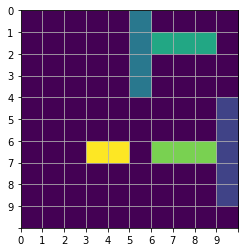

In [ ]:
joueur3.afficher_bataille()

#### joueur et voir le nombre de coup

In [ ]:
joueur3.jouer_probaSimple()

78

#### affichage de la grille apres avoir joué

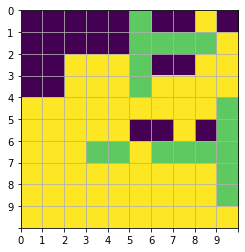

In [ ]:
joueur3.afficher_bataille()

###  distribution de la variable aléatoire correspondant au nombre de coups pour terminer une partie

### Attention ça prend du temps

In [ ]:
distribution_prob=[]
for i in range(1,1000):
  joueur3 = probabiliste_simplifiee()
  compteur=joueur3.jouer_probaSimple()
  distribution_prob.append(compteur)

#### Tracez le graphique de la distribution

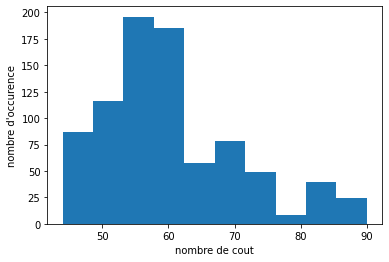

In [ ]:
plt.hist(distribution_prob)
plt.xlabel('nombre de cout')
plt.ylabel("nombre d'occurence")
plt.show()

#**Parite 4 : Senseur imparfait : à la recherche de l’USS Scorpion**

In [241]:
# vous pouver changer la valeur de ps et la position de l'objet perdu
ps = 0.6
pos_obj_perdu=(7,1)

## Recherche d'un objet sans connaissance

In [242]:
def recherche_objet_perdu_simple():
  obj_trouve= False
  #on initialise le nombre de compteur des essaie à 0
  nb_essaie=0
  while(obj_trouve != True):
    #tout les cases sont equiprobables
    for i in range(taille_grille):
      for j in range(taille_grille):
        nb_essaie+=1
        pos_senseur=i,j
        #on genere une proba du senseur 
        proba_senseur = rd.random()
        #on test les deux conditions comme demander dans l'énancer
        if( pos_senseur == pos_obj_perdu and (proba_senseur >= ps) ):
          obj_trouve=True
          return nb_essaie

### test

In [107]:
recherche_objet_perdu_simple()

66

## Recherche sous marin

In [243]:
def genere_grille_float():
  # generer une matrice des float initialisée à zéro
    grille=np.zeros((taille_grille, taille_grille),dtype=float)
    return grille

In [244]:
def grille_proba_sous_marin():
  '''fonction qui genere une matrice de probabilite en prenant compte
  des bords et du centre'''
  #initialiser une matrice de proba à zero
  grille=genere_grille_float()
  proba_centre=0.8
  proba_bords=0.2
  nb_case_centre=6*6
  #liste des bords
  liste_ferme=[0, 1, taille_grille - 1, taille_grille - 2]
  #parcourir la matrice
  for i in range(taille_grille):
    for j in range(taille_grille):
      # si la position est une position de bord alors elle a une proba entre 0.0 et 0.3
      if( (i in liste_ferme) or (j in liste_ferme) ):
        grille[i][j]=proba_centre/nb_case_centre
        proba_centre-=grille[i][j]
      # sinon les positions du centre ont une proba entre 0.31 et 1.0
      else:
        grille[i][j]=proba_bords/(taille_grille*taille_grille-nb_case_centre)
        proba_bords-=grille[i][j]
  return grille

In [212]:
grille_proba_sous_marin()

array([[0.02222222, 0.02160494, 0.0210048 , 0.02042133, 0.01985408,
        0.01930257, 0.01876639, 0.0182451 , 0.01773829, 0.01724556],
       [0.01676652, 0.01630078, 0.01584798, 0.01540776, 0.01497977,
        0.01456366, 0.01415912, 0.01376581, 0.01338343, 0.01301166],
       [0.01265023, 0.01229883, 0.003125  , 0.00307617, 0.00302811,
        0.00298079, 0.00293422, 0.00288837, 0.0119572 , 0.01162505],
       [0.01130214, 0.01098819, 0.00284324, 0.00279881, 0.00275508,
        0.00271203, 0.00266966, 0.00262795, 0.01068296, 0.01038621],
       [0.01009771, 0.00981721, 0.00258688, 0.00254646, 0.00250668,
        0.00246751, 0.00242895, 0.002391  , 0.00954451, 0.00927939],
       [0.00902163, 0.00877103, 0.00235364, 0.00231687, 0.00228067,
        0.00224503, 0.00220995, 0.00217542, 0.00852739, 0.00829052],
       [0.00806022, 0.00783633, 0.00214143, 0.00210797, 0.00207503,
        0.00204261, 0.00201069, 0.00197928, 0.00761865, 0.00740702],
       [0.00720127, 0.00700124, 0.0019483

In [245]:
def mise_a_jour(grille_p,pos_max):
  '''fonction qui permet de mettre a jour la matrice de probabilite
  qui prend en compte l'ancienne position max et calcule ensuite
  les nouvelles probabilités'''
  # recuperer les coordonnées de l'ancienne pos max
  px=pos_max[0]
  py=pos_max[1]
  # recuperer la valeur du proba max precedente
  ancienne_proba_max = grille_p[px,py]
  # calculer la nouvelle proba pour l'ancienne proba max
  nouvelle_proba_max = (ancienne_proba_max * (1 - ps)) / (1 - ancienne_proba_max * ps)
  grille_p[px,py] = nouvelle_proba_max
  # le facteur de mise a jour
  facteur = (1 - ancienne_proba_max * ps)
  #  mise a jour des toutes les positions
  for i in range(taille_grille):
    for j in range(taille_grille):
      if (i,j) != pos_max:
        grille_p[i,j] = grille_p[i,j] / facteur

In [246]:
def recherche_obj_perdu_sous_marin(pos_objet_perdu):
  #on genere une grille de proba
  grille=grille_proba_sous_marin()
  # variable booleene pour arreter le processus
  trouve = False
  # initialisation d'un compteur 
  compteur = 0
  while (trouve==False):
    compteur+=1
    # on cherche la position avec la proba max dans notre grille
    position_max_proba = np.unravel_index(grille.argmax(),grille.shape)
    # on test si le senseur détecte le sous marin
    proba_senseur = rd.random()
    if( position_max_proba == pos_obj_perdu and (proba_senseur >=ps) ):
      trouve = True
      return compteur
    else:
      # sinon on mit a jour notre proba et on refait le processus
      mise_a_jour(grille,position_max_proba)

### test

In [250]:
recherche_obj_perdu_sous_marin(pos_obj_perdu)

51